In [1]:
# !pip install opencv-python


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
with_masks_files = os.listdir('data/with_mask')

In [4]:
without_masks_files = os.listdir('data/without_mask')

In [5]:
type(with_masks_files)

list

In [6]:
print(with_masks_files[0:10])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg', 'with_mask_1002.jpg', 'with_mask_1003.jpg', 'with_mask_1004.jpg', 'with_mask_1005.jpg', 'with_mask_1006.jpg']


In [7]:
print(without_masks_files[0:10])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg', 'without_mask_1002.jpg', 'without_mask_1003.jpg', 'without_mask_1004.jpg', 'without_mask_1005.jpg', 'without_mask_1006.jpg']


In [8]:
print("Number of with mask images: ",len(with_masks_files))
print("Number of without mask images: ",len(without_masks_files))
print("Total Number of Images: ", len(with_masks_files) + len(without_masks_files))

Number of with mask images:  3725
Number of without mask images:  3827
Total Number of Images:  7552


In [9]:
# with mask -> 1
# without mask -> 0
# 4 images
# 2. face mask.jpg , face mask.jpg [1,1]
# 2. face without mask.jpg, face without mask.jpg [0,0]
# [0.5, 0.7, 0.8 ....] [1]

In [10]:
with_masks_labels = [1] * 3725
without_masks_labels = [0] * 3827

In [11]:
len(with_masks_labels)

3725

In [12]:
len(without_masks_labels)

3827

In [13]:
labels = with_masks_labels + without_masks_labels

In [14]:
labels[-2]

0

In [15]:
len(labels)

7552

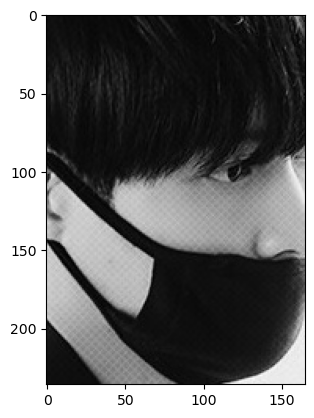

In [16]:
#With Masks

img = mpimg.imread('data/with_mask/with_mask_1003.jpg')
imgplot = plt.imshow(img)
plt.show()


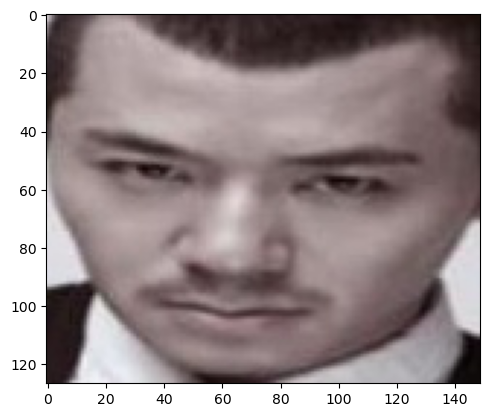

In [17]:
#Without Masks

img = mpimg.imread('data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

In [18]:
# Convert img into numpy + resize array + RGB

In [19]:
with_masks_path = 'data/with_mask/'

data = []
for img_file in with_masks_files:
    image = Image.open(with_masks_path + img_file) # cv2.imread(with_masks_path + img_file)
    
    image = image.resize((128, 128)) # cv2.resize(image, (128,128))
    
    image = image.convert('RGB') #cv2.cvtColor(image, COLOR_BGR2RGB)
    
    image = np.array(image)
    data.append(image)

In [20]:
without_masks_path = 'data/without_mask/'


for img_file in without_masks_files:
    image = Image.open(without_masks_path + img_file) # cv2.imread(without_masks_path + img_file)
    
    image = image.resize((128, 128)) # cv2.resize(image, (128,128))
    
    image = image.convert('RGB') #cv2.cvtColor(image, COLOR_BGR2RGB)
    
    image = np.array(image)
    data.append(image)

In [21]:
len(data)

7552

In [22]:
type(data)

list

In [23]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [24]:
data[0].shape #(128, 128, 3) # 128 -->width, height 3---> number of channels

(128, 128, 3)

In [25]:
#Dependent and Indepentent data

In [26]:
X = np.array(data)
Y = np.array(labels)

In [27]:
print(X[0].shape)

(128, 128, 3)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape

((6041, 128, 128, 3), (6041,))

In [31]:
X_test.shape, y_test.shape

((1511, 128, 128, 3), (1511,))

In [32]:
# Normalization the data(Covert the data zero to one)

X_train_scale = X_train/255
X_test_scale = X_test/255


In [33]:
X_train_scale.shape

(6041, 128, 128, 3)

In [34]:
# reshaped --> (Number of image, width, height, channel)

## CNN Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation='relu', input_shape = (128, 128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [38]:
history = model.fit(X_train_scale, y_train, validation_split=0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 51s 275ms/step - acc: 0.7156 - loss: 0.6212 - val_acc: 0.9124 - val_loss: 0.2407
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 46s 270ms/step - acc: 0.8905 - loss: 0.2837 - val_acc: 0.9223 - val_loss: 0.1778
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 251ms/step - acc: 0.9060 - loss: 0.2468 - val_acc: 0.9388 - val_loss: 0.1591
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 42s 245ms/step - acc: 0.9226 - loss: 0.1954 - val_acc: 0.9388 - val_loss: 0.1607
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - acc: 0.9402 - loss: 0.1680 - val_acc: 0.9471 - val_loss: 0.1457


In [39]:
loss, accuracy = model.evaluate(X_test_scale, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - acc: 0.9366 - loss: 0.1961


In [40]:
print("Loss is: ", loss)
print("Accuracy is:", accuracy)

Loss is:  0.20002219080924988
Accuracy is: 0.9311714172363281


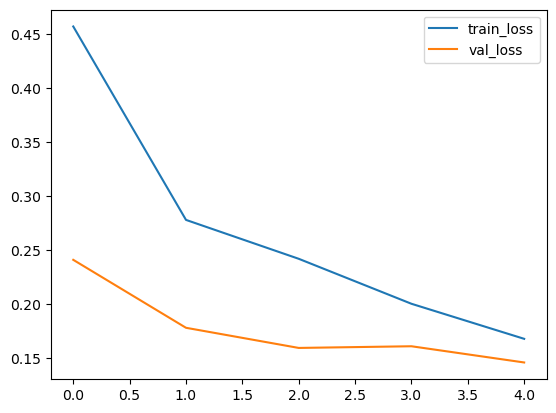

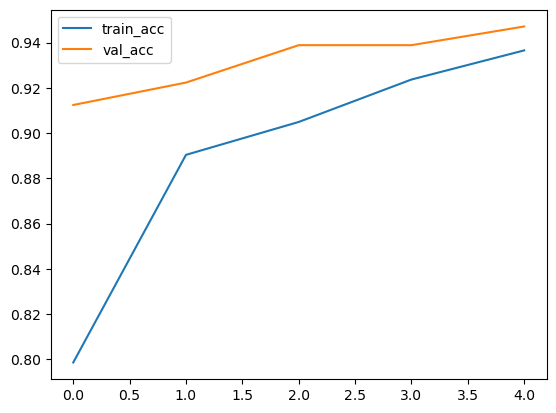

In [41]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()


In [42]:
# An H5 is one of the Hierarchical Data Formats (HDF) used to store large amount of data.

model.save("model.h5") 